# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [107]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn.linear_model import LinearRegression
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [108]:
data = pd.read_csv('resources/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [109]:
# Ваш код здесь

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [110]:
df = data.copy()
prod = df.Prod
df = df.drop('Prod', axis=1)
df.insert(0, 'Prod', prod)
df

,Prod,Well,Por,Perm,AI,Brittle,TOC,VR
0,4165.196191,1,12.08,2.92,2.80,81.40,1.16,2.31
1,3561.146205,2,12.38,3.53,3.22,46.17,0.89,1.88
2,4284.348574,3,14.02,2.59,4.01,72.80,0.89,2.72
3,5098.680869,4,17.67,6.75,2.63,39.81,1.08,1.88
4,3406.132832,5,17.52,4.57,3.18,10.94,1.51,1.90
...,...,...,...,...,...,...,...,...
195,3847.571003,196,11.95,3.13,2.97,67.18,0.80,2.06
196,5601.227131,197,17.99,9.87,3.38,44.32,0.98,2.08
197,3409.575363,198,12.12,2.27,3.52,57.07,-0.04,1.73
198,5087.592149,199,15.55,4.48,2.48,58.25,1.89,2.35


In [111]:
df_corr = df.corr()
df_corr

,Prod,Well,Por,Perm,AI,Brittle,TOC,VR
Prod,1.000000,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182
Well,0.026817,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279
Por,0.861910,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860
Perm,0.727426,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023
AI,-0.390835,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143
Brittle,0.237155,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929
TOC,0.654445,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483
VR,0.323182,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000


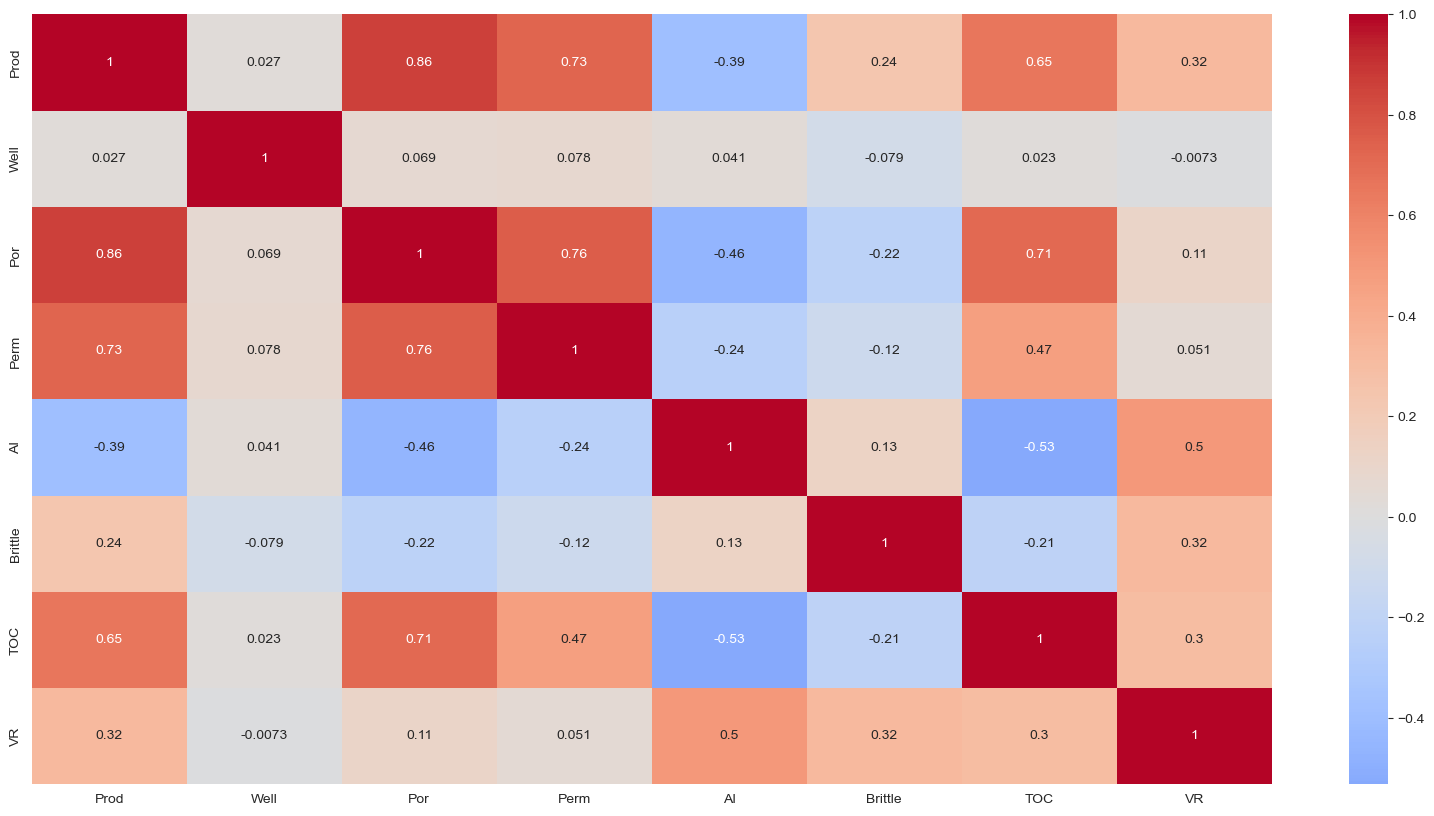

In [112]:
# Построение тепловой карты
plt.figure(figsize=(20, 10))  # Устанавливаем размер графика
sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0)  # Строим саму карту

# Показываем график
plt.show()

In [113]:
print(f'Ранг матрицы: ', np.linalg.matrix_rank(df_corr))
print(f'Определитель матрицы: ', np.linalg.det(df_corr))


Ранг матрицы:  8
Определитель матрицы:  0.0007299388072651999


> *Ваши выводы здесь*

1. "Какие факторы сильнее всего коррелируют с целевой переменной?":\
Por, Perm, TOC
2. "Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?":\
Да, является. Её определитель 0.007 близок к 0
3. "Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?":\
Коллинеарных векторов в матрице нет, т.к. ее ранг соответствует размеру и в матрице на пересечениях нет значений 1.\
Однако присутствует мультиколлинеарность, т.к. определитель стремится к 0

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [114]:
x = df.copy()
del x['Prod']
y = df['Prod']
x = np.column_stack((np.ones(200), x.values))

In [115]:
# вычислим OLS-оценку для коэффициентов
w_hat = np.round(np.linalg.inv(x.T@x)@x.T@y, 0)
print('w_hat: ', w_hat)

w_hat:  [-1232.     0.   230.   116.  -365.    25.   -78.   785.]


> *Ваши выводы здесь*

К неинформативным признакам можно отнести признак "Well", т.к. он не оказывает никакого влияния на "Prod"\
Так же очень слабой связью обладает признак "Brittle".

Признаки "VR", "AI" обладают слабой связью.

А вот признаки "Por" и "Perm" обладают уже сильной связью с признаком "Prod" и оказывают довольно большое влияние.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [116]:
new_d = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
new = np.array([[1, *new_d.values()]])
new_v = (new@w_hat)[0]
print('prediction:', new_v)

prediction: 4715.26


In [117]:
real_v = 4748.315024
ab_err = round(real_v - new_v, 6)
print(f'Абсолютная ошибка: {ab_err}')

Абсолютная ошибка: 33.055024


In [118]:
x = pd.DataFrame(x)

In [119]:
d = pd.DataFrame()
d['prod'] = x.apply(lambda z: (z@w_hat), axis=1)

In [120]:
df.insert(0, 'prod_p', d['prod'])

In [176]:
mae = np.mean(np.abs(df['Prod'] - df['prod_p']))
print(f'Средняя абсолютная ошибка: {mae}')

mse = np.mean((df['Prod'] - df['prod_p']) ** 2)
print(f'Средняя квадратичная ошибка: {mse}')

Средняя абсолютная ошибка: 154.55804282999995
Средняя квадратичная ошибка: 39384.74080127818


> *Ваши выводы здесь*

Для оценки качества модели выбраны метрики оценки качества MAE и MSE.

MAE = 154.558 - указывает на то, что в среднем предсказанные значения отличаются от реальных на 154.558 единиц

MSE = 39385 - указывает на то, что в предсказаниях присутствуют большие ошибки. Опираясь на этот показать при сравнении\
с другими моделями можно будет сравнить влияние выбросов.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [123]:
w_hat

array([-1232.,     0.,   230.,   116.,  -365.,    25.,   -78.,   785.])

> *Ваши выводы здесь*

Коэфф. корреляции "TOC" 0.65 противоречит коэффициенту в модели линейной регрессии -78.\
Зависимость должна быть линейной, а получилась обратной.

Противоречие может быть связано с:
1. мультиколлинеарностью - на значение повлияла корреляция "TOC" с другими параметрами
2. выбросами данных

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [178]:
x = df.copy()
y = df['Prod']
x.drop(['prod_p', 'Perm', 'TOC', 'Well'], axis=1, inplace=True)

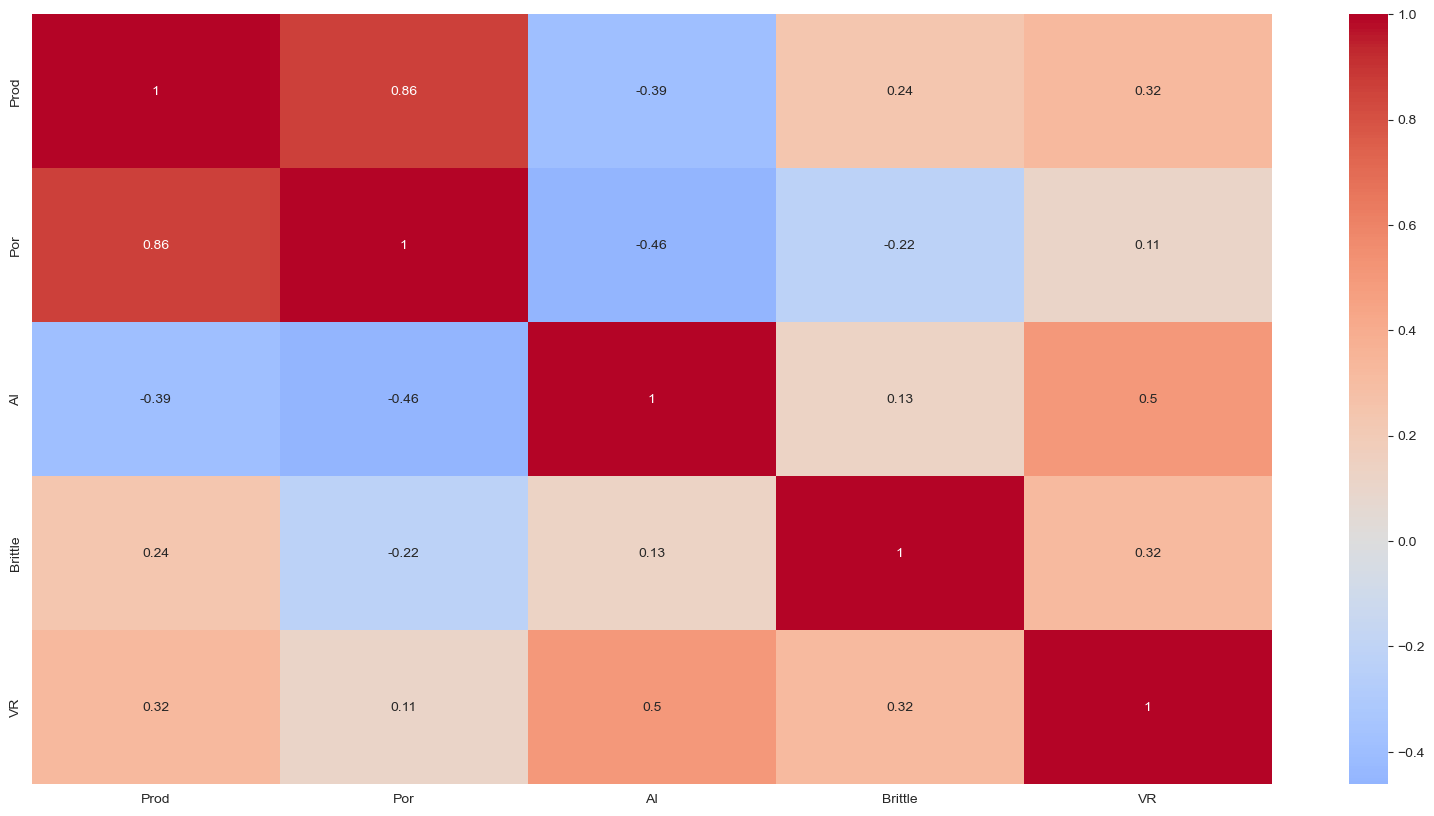

In [179]:
# Построение тепловой карты
plt.figure(figsize=(20, 10))  # Устанавливаем размер графика
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', center=0)  # Строим саму карту

# Показываем график
plt.show()

In [180]:
x.drop(['Prod'], axis=1, inplace=True)

In [181]:
x

,Por,AI,Brittle,VR
0,12.08,2.80,81.40,2.31
1,12.38,3.22,46.17,1.88
2,14.02,4.01,72.80,2.72
3,17.67,2.63,39.81,1.88
4,17.52,3.18,10.94,1.90
...,...,...,...,...
195,11.95,2.97,67.18,2.06
196,17.99,3.38,44.32,2.08
197,12.12,3.52,57.07,1.73
198,15.55,2.48,58.25,2.35


In [182]:
print(f'Ранг матрицы: ', np.linalg.matrix_rank(x.corr()))
print(f'Определитель матрицы: ', np.linalg.det(x.corr()))

Ранг матрицы:  4
Определитель матрицы:  0.3682630361164221


In [183]:
x = np.column_stack((np.ones(200), x.values))

In [184]:
w_hat = np.round(np.linalg.inv(x.T@x)@x.T@y, 0)
print('w_hat: ', w_hat)

w_hat:  [-1835.   293.  -200.    28.   517.]


In [185]:
x = pd.DataFrame(x)
d = pd.DataFrame()
d['prod'] = x.apply(lambda z: (z@w_hat), axis=1)

In [186]:
y = pd.DataFrame(y)

In [187]:
mae = np.mean(np.abs(y['Prod'] - d['prod']))
print(f'Средняя абсолютная ошибка: {mae}')

mse = np.mean((y['Prod'] - d['prod']) ** 2)
print(f'Средняя квадратичная ошибка: {mse}')

Средняя абсолютная ошибка: 171.86829464000002
Средняя квадратичная ошибка: 53958.43717716489


> *Ваши выводы здесь*

1. Коэффициенты w_hat по направлению соответствуют матрице корреляции
2. Коэффициенты при Por, AI, VR ощутимо изменились после удаления связанных с ними векторов
3. Ошибки MAE и MSE ощутимо возросли

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [190]:
model = LinearRegression(fit_intercept=False)
model.fit(x, y)
print('w_hat:', np.round(model.coef_, 0))

w_hat: [[-1835.   293.  -200.    28.   517.]]


In [197]:
d = pd.DataFrame(model.predict(x), columns=['prod'])

In [198]:
mae = np.mean(np.abs(y['Prod'] - d['prod']))
print(f'Средняя абсолютная ошибка: {mae}')

mse = np.mean((y['Prod'] - d['prod']) ** 2)
print(f'Средняя квадратичная ошибка: {mse}')

Средняя абсолютная ошибка: 171.4314605958078
Средняя квадратичная ошибка: 53660.85457923532


> *Ваши выводы здесь*

1. Код - сильно проще)
2. Результаты расчетов аналогичны ручному расчету 

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [199]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [234]:
x_clean = df.copy()
x_clean.drop(['Prod', 'prod_p', 'Perm', 'TOC', 'Well'], axis=1, inplace=True)
x_clean

,Por,AI,Brittle,VR
0,12.08,2.80,81.40,2.31
1,12.38,3.22,46.17,1.88
2,14.02,4.01,72.80,2.72
3,17.67,2.63,39.81,1.88
4,17.52,3.18,10.94,1.90
...,...,...,...,...
195,11.95,2.97,67.18,2.06
196,17.99,3.38,44.32,2.08
197,12.12,3.52,57.07,1.73
198,15.55,2.48,58.25,2.35


In [237]:
x = x_clean.copy()
y = df['Prod']

scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x_scale)
pd.DataFrame(x_poly).shape

(200, 34)

In [238]:
lr = LinearRegression()

cv_results_lr_mae = cross_validate(lr, x_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f} ед.'.format(-cv_results_lr_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f} ед.'.format(-cv_results_lr_mae['test_score'].mean()))

print('\n')

cv_results_lr_mse = cross_validate(lr, x_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
print('MSE на тренировочных фолдах: {:.2f} ед.^2'.format(-cv_results_lr_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f} ед.^2'.format(-cv_results_lr_mse['test_score'].mean()))

MAE на тренировочных фолдах: 75.35 ед.
MAE на валидационных фолдах: 110.47 ед.


MSE на тренировочных фолдах: 10162.07 ед.^2
MSE на валидационных фолдах: 24335.09 ед.^2


> *Ваши выводы здесь*

Значения MAE (75.35 на тренировочных данных и 110.47 на валидационных) показывают, что модель хорошо подстраивается под тренировочные данные, но хуже обобщается на валидационных, что указывает на возможное переобучение.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [257]:
part1 = np.arange(0.1, 1, 0.1)

part2 = np.arange(1, 101, 1)

params_to_check = np.concatenate((part1, part2))

In [258]:
params_to_check

array([  0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
         1. ,   2. ,   3. ,   4. ,   5. ,   6. ,   7. ,   8. ,   9. ,
        10. ,  11. ,  12. ,  13. ,  14. ,  15. ,  16. ,  17. ,  18. ,
        19. ,  20. ,  21. ,  22. ,  23. ,  24. ,  25. ,  26. ,  27. ,
        28. ,  29. ,  30. ,  31. ,  32. ,  33. ,  34. ,  35. ,  36. ,
        37. ,  38. ,  39. ,  40. ,  41. ,  42. ,  43. ,  44. ,  45. ,
        46. ,  47. ,  48. ,  49. ,  50. ,  51. ,  52. ,  53. ,  54. ,
        55. ,  56. ,  57. ,  58. ,  59. ,  60. ,  61. ,  62. ,  63. ,
        64. ,  65. ,  66. ,  67. ,  68. ,  69. ,  70. ,  71. ,  72. ,
        73. ,  74. ,  75. ,  76. ,  77. ,  78. ,  79. ,  80. ,  81. ,
        82. ,  83. ,  84. ,  85. ,  86. ,  87. ,  88. ,  89. ,  90. ,
        91. ,  92. ,  93. ,  94. ,  95. ,  96. ,  97. ,  98. ,  99. ,
       100. ])

In [264]:
grid_search_lasso = GridSearchCV(
    estimator=Lasso(),
    param_grid={
        'alpha': params_to_check
    },
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
)
grid_search_lasso.fit(x_poly, y)

print("Лучшие гиперпараметры:", grid_search_lasso.best_params_)
print("Лучшая метрика (MAE):", -grid_search_lasso.best_score_)
print('\n')

lasso = Lasso(alpha=grid_search_lasso.best_params_['alpha'], max_iter=10000)

cv_results_lasso_mae = cross_validate(lasso, x_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
cv_results_lasso_mse = cross_validate(lasso, x_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f} ед.'.format(-cv_results_lasso_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f} ед.'.format(-cv_results_lasso_mae['test_score'].mean()))
print('\n')
print('MSE на тренировочных фолдах: {:.2f} ед.^2'.format(-cv_results_lasso_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f} ед.^2'.format(-cv_results_lasso_mse['test_score'].mean()))

Лучшие гиперпараметры: {'alpha': 5.0}
Лучшая метрика (MAE): 95.69490293534996
MAE на тренировочных фолдах: 78.30 ед.
MAE на валидационных фолдах: 95.69 ед.


MSE на тренировочных фолдах: 11422.63 ед.^2
MSE на валидационных фолдах: 17260.89 ед.^2


> *Ваши выводы здесь*

Значения MAE (78.30 на тренировочных данных и 95.69 на валидационных) показывают, что модель хорошо подстраивается под тренировочные данные, но хуже обобщается на валидационных, что указывает на возможное переобучение.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [267]:
grid_search_ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid={
        'alpha': params_to_check
    },
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
)
grid_search_ridge.fit(x_poly, y)

print("Лучшие гиперпараметры:", grid_search_ridge.best_params_)
print("Лучшая метрика (MAE):", -grid_search_ridge.best_score_)
print('\n')

ridge = Ridge(alpha=grid_search_ridge.best_params_['alpha'])

cv_results_ridge_mae = cross_validate(ridge, x_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
cv_results_ridge_mse = cross_validate(ridge, x_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f} ед.'.format(-cv_results_ridge_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f} ед.'.format(-cv_results_ridge_mae['test_score'].mean()))
print('\n')
print('MSE на тренировочных фолдах: {:.2f} ед.^2'.format(-cv_results_ridge_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f} ед.^2'.format(-cv_results_ridge_mse['test_score'].mean()))

Лучшие гиперпараметры: {'alpha': 0.2}
Лучшая метрика (MAE): 110.06942279040723


MAE на тренировочных фолдах: 75.40 ед.
MAE на валидационных фолдах: 110.07 ед.


MSE на тренировочных фолдах: 10184.29 ед.^2
MSE на валидационных фолдах: 24013.16 ед.^2


> *Ваши выводы здесь*

Значения MAE (75.40 на тренировочных данных и 110.07 на валидационных) показывают, что модель хорошо подстраивается под тренировочные данные, но хуже обобщается на валидационных, что указывает на возможное переобучение.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [276]:
grid_search_elasticnet = GridSearchCV(
    estimator=ElasticNet(max_iter=10000),
    param_grid={
        'alpha': params_to_check,
        'l1_ratio': part1
    },
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
)
grid_search_elasticnet.fit(x_poly, y)

print("Лучшие гиперпараметры:", grid_search_elasticnet.best_params_)
print("Лучшая метрика (MAE):", -grid_search_elasticnet.best_score_)
print('\n')

elasticnet = ElasticNet(
    alpha=grid_search_elasticnet.best_params_['alpha'],
    l1_ratio=grid_search_elasticnet.best_params_['l1_ratio'],
    max_iter=10000
)

cv_results_elasticnet_mae = cross_validate(elasticnet, 
                                           x_poly, 
                                           y, 
                                           scoring='neg_mean_absolute_error', 
                                           cv=5, 
                                           return_train_score=True)
cv_results_elasticnet_mse = cross_validate(elasticnet, 
                                           x_poly, 
                                           y, 
                                           scoring='neg_mean_squared_error', 
                                           cv=5, 
                                           return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f} ед.'.format(-cv_results_elasticnet_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f} ед.'.format(-cv_results_elasticnet_mae['test_score'].mean()))
print('\n')
print('MSE на тренировочных фолдах: {:.2f} ед.^2'.format(-cv_results_elasticnet_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f} ед.^2'.format(-cv_results_elasticnet_mse['test_score'].mean()))

Лучшие гиперпараметры: {'alpha': 0.1, 'l1_ratio': 0.9}
Лучшая метрика (MAE): 112.97994157329188


MAE на тренировочных фолдах: 79.15 ед.
MAE на валидационных фолдах: 112.98 ед.


MSE на тренировочных фолдах: 10947.25 ед.^2
MSE на валидационных фолдах: 24101.01 ед.^2


> *Ваши выводы здесь*

Значения MAE (79.15 на тренировочных данных и 112.98 на валидационных) показывают, что модель хорошо подстраивается под тренировочные данные, но хуже обобщается на валидационных, что указывает на возможное переобучение.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [272]:
res = [[
    'LinearRegression',
    np.NaN,
    np.bool_(False),
    format(-cv_results_lr_mae['train_score'].mean(), '.2f'),
    format(-cv_results_lr_mae['test_score'].mean(), '.2f'),
    format(-cv_results_lr_mse['train_score'].mean(), '.2f'),
    format(-cv_results_lr_mse['test_score'].mean(), '.2f'),
], [
    'Lasso',
    grid_search_lasso.best_params_,
    np.bool_(True),
    format(-cv_results_lasso_mae['train_score'].mean(), '.2f'),
    format(-cv_results_lasso_mae['test_score'].mean(), '.2f'),
    format(-cv_results_lasso_mse['train_score'].mean(), '.2f'),
    format(-cv_results_lasso_mse['test_score'].mean(), '.2f'),
], [
    'Ridge',
    grid_search_ridge.best_params_,
    np.bool_(True),
    format(-cv_results_ridge_mae['train_score'].mean(), '.2f'),
    format(-cv_results_ridge_mae['test_score'].mean(), '.2f'),
    format(-cv_results_ridge_mse['train_score'].mean(), '.2f'),
    format(-cv_results_ridge_mse['test_score'].mean(), '.2f'),
], [
    'ElasticNet',
    grid_search_elasticnet.best_params_,
    np.bool_(True),
    format(-cv_results_elasticnet_mae['train_score'].mean(), '.2f'),
    format(-cv_results_elasticnet_mae['test_score'].mean(), '.2f'),
    format(-cv_results_elasticnet_mse['train_score'].mean(), '.2f'),
    format(-cv_results_elasticnet_mse['test_score'].mean(), '.2f'),
]]

results_df = pd.DataFrame(
    res, 
    columns=[
        'model_name', 
        'hyperparameters', 
        'is_use_poly_features',
        'cv_train_score_mae',
        'cv_test_score_mae',
        'cv_train_score_mse',
        'cv_test_score_mse',
    ]
)

In [274]:
results_df.head()

,model_name,hyperparameters,is_use_poly_features,cv_train_score_mae,cv_test_score_mae,cv_train_score_mse,cv_test_score_mse
0,LinearRegression,NaN,False,75.35,110.47,10162.07,24335.09
1,Lasso,{'alpha': 5.0},True,78.30,95.69,11422.63,17260.89
2,Ridge,{'alpha': 0.2},True,75.40,110.07,10184.29,24013.16
3,ElasticNet,"{'alpha': 0.1, 'l1_ratio': 0.9}",True,79.15,112.98,10947.25,24101.01


> *Ваши выводы здесь*


На мой взгляд лучше всего себя показала модель Lasso\
Она показала лучшие результаты на валидационных фолдах, а так же самый низкий результат в больших выбросах

